In [1]:
from autocluster import AutoCluster
from evaluators import get_evaluator
from sklearn import datasets
from collections import Counter
from utils.metafeatures import MetafeatureMapper
from sklearn.metrics.cluster import v_measure_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import os
import json

%load_ext autoreload
%autoreload 2

In [2]:
# configurations
config = {
    'random_seed': 27,
    'test_size': 0.1666,
    'general_metafeatures': MetafeatureMapper.getGeneralMetafeatures(),
    'numeric_metafeatures': MetafeatureMapper.getNumericMetafeatures(),
    'categorical_metafeatures': [],
    'n_folds': 3,
    'n_evaluations': 10,
    'cutoff_time': 100
}

In [3]:
# set random seed
random.seed(config['random_seed'])
np.random.seed(config['random_seed'])

In [4]:
# read all available benchmark datasets
metafeatures_table = pd.read_csv('metaknowledge/benchmark_silhouette_metafeatures_table.csv', sep=',')
print(len(metafeatures_table))

120


In [5]:
# split benchmark data into train and test
train_idx, test_idx = train_test_split([i for i in range(len(metafeatures_table))], 
                                       test_size=config['test_size'], random_state=config['random_seed'])
metafeatures_table_train, metafeatures_table_test = metafeatures_table.iloc[train_idx, :], metafeatures_table.iloc[test_idx, :]
metafeatures_table_train, metafeatures_table_test = metafeatures_table_train.reset_index(drop=True), \
                                                    metafeatures_table_test.reset_index(drop=True)

In [6]:
# save the train metafeatures table
metafeatures_table_train.to_csv('{}/{}.csv'.format('metaknowledge', 'benchmark_silhouette_metafeatures_table_100'), 
                                encoding='utf-8', index=False)
metafeatures_table_test.head(5)

,PCAFractionOfComponentsFor95PercentVariance,PCAKurtosisFirstPC,PCASkewnessFirstPC,dataset,firstQuartileCorrelation,firstQuartileCovariance,firstQuartileEntropy,firstQuartileKurtosis,firstQuartileSkewness,logNumberOfInstances,...,missingValuesRatio,numberOfInstances,numberOfMissingValues,sparsity,sparsityOnNumericColumns,thirdQuartileCorrelation,thirdQuartileCovariance,thirdQuartileEntropy,thirdQuartileKurtosis,thirdQuartileSkewness
0,0.878906,-1.937814,-0.003638,g2-256-100.csv,0.185686,2.304221e+03,NaN,-0.146360,-0.036813,7.624131,...,0.0,2047.0,0,0.0,0.0,0.210489,2.638842e+03,NaN,-0.025721,0.034739
1,0.875000,-1.858992,0.004185,g2-16-40.csv,0.604397,2.419264e+03,NaN,-0.774346,0.004535,7.601402,...,0.0,2001.0,0,0.0,0.0,0.619029,2.515999e+03,NaN,-0.722970,0.032039
2,1.000000,-0.814508,0.291618,s2.csv,0.225516,8.247831e+09,NaN,-1.032196,-0.209459,8.067776,...,0.0,3190.0,0,0.0,0.0,0.225516,3.513315e+10,NaN,-0.867376,0.012480
3,0.600000,-1.038316,-0.133387,dim10.csv,-0.226993,-2.237088e+09,NaN,-1.194670,-0.485906,8.088255,...,0.0,3256.0,0,0.0,0.0,0.258474,7.003268e+09,NaN,0.443168,-0.007410
4,0.937500,-1.700258,0.015196,g2-16-60.csv,0.407387,2.425100e+03,NaN,-0.407046,-0.058424,7.607878,...,0.0,2014.0,0,0.0,0.0,0.426521,2.607718e+03,NaN,-0.316972,0.020959


Testing dataset: g2-256-100.csv
2047/2047 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Typ

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')


Found 30 relevant intial configurations from warmstarter.
Truncated n_evaluations: 10
{'abort_on_first_run_crash': False, 'cs': Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default

/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

Score obtained by this configuration: 0.27245445251581674
Fitting configuration: 
{'batch_size___IncrementalPCA': 97, 'clustering_choice': 'Birch', 'whiten___IncrementalPCA': True, 'branching_factor___Birch': 122, 'n_clusters___Birch': 28, 'n_components___IncrementalPCA': 2, 'dim_reduction_choice': 'IncrementalPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (11) by Birch is less than (28). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (28). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (12) by Birch is less than (28). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (28). Decrease the threshold.
  % (len(centroid

Score obtained by this configuration: 0.2624573526373197
Fitting configuration: 
{'n_components___FastICA': 2, 'fun___FastICA': 'exp', 'n_clusters___MiniBatchKMeans': 7, 'clustering_choice': 'MiniBatchKMeans', 'algorithm___FastICA': 'deflation', 'whiten___FastICA': True, 'dim_reduction_choice': 'FastICA', 'batch_size___MiniBatchKMeans': 432}
Score obtained by this configuration: 0.2705844875003219
Fitting configuration: 
{'batch_size___IncrementalPCA': 139, 'clustering_choice': 'Birch', 'whiten___IncrementalPCA': True, 'branching_factor___Birch': 355, 'n_clusters___Birch': 50, 'n_components___IncrementalPCA': 2, 'dim_reduction_choice': 'IncrementalPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (12) by Birch is less than (50). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (50). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (11) by Birch is less than (50). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (8) by Birch is less than (50). Decrease the threshold.
  % (len(centroid

Score obtained by this configuration: 0.26100958958875053
Optimization is complete.
Took 101.2 seconds.
The optimal configuration is 
Configuration:
  cluster_method___OPTICS, Value: 'xi'
  clustering_choice, Value: 'OPTICS'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 6.846345445445432
  metric___OPTICS, Value: 'l2'
  min_samples___OPTICS, Value: 196
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 87.73029651657045



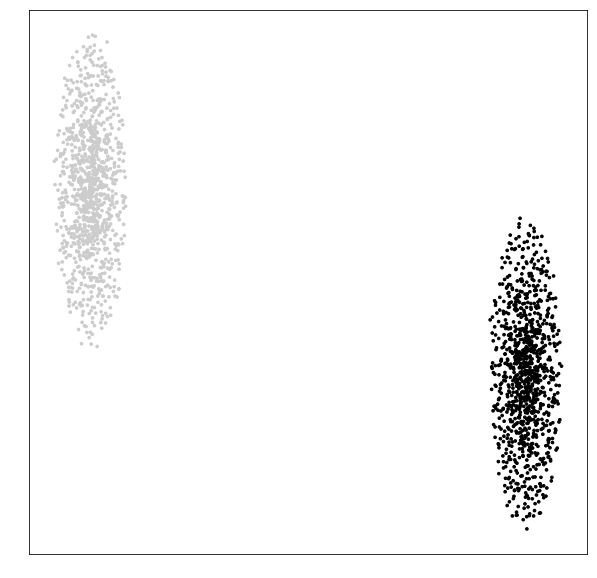

Testing dataset: g2-16-40.csv
1999/2047 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type:

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')


Fitting configuration: 
{'early_exaggeration___TSNE': 10.874911468774856, 'min_samples___DBSCAN': 63, 'eps___DBSCAN': 2.879139233637891, 'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 273.3423522557149, 'n_components___TSNE': 2}
Score obtained by this configuration: 0.019108275572458904
Fitting configuration: 
{'early_exaggeration___TSNE': 12.594033403813343, 'min_samples___DBSCAN': 5, 'eps___DBSCAN': 3.780605816446243, 'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 258.91842999536664, 'n_components___TSNE': 2}
Score obtained by this configuration: 0.019086599349975586
Fitting configuration: 
{'early_exaggeration___TSNE': 14.279631970464933, 'min_samples___DBSCAN': 7, 'eps___DBSCAN': 0.5910751940055473, 'clustering_choice': 'DBSCAN', 'dim_reduction_choice': 'TSNE', 'perplexity___TSNE': 258.73031989284414, 'n_components___TSNE': 2}
Score obtained by this configuration: 0.01933268706003825
Fitting configuration: 
{

In [ ]:
# helper function
def read_json_file(filename):
   with open(filename) as f_in:
       return(json.load(f_in))
    
# get names of test datasets
test_datasets = list(metafeatures_table_test['dataset'])

for dataset_name in test_datasets:
    print("Testing dataset: {}".format(dataset_name))
    dataset_basename, _ = os.path.splitext(dataset_name)
    dataset = pd.read_csv('../data/benchmark_data/{}.csv'.format(dataset_basename), 
                          header='infer', sep=',')
    
    # prepare dictionary for preprocessing
    preprocess_dict = read_json_file('../data/benchmark_data/{}.json'.format(dataset_basename))
    preprocess_dict = {k: v for k, v in preprocess_dict.items() 
                       if k in ["numeric_cols", "categorical_cols", "ordinal_cols", "y_col", "ignore_cols"]}
    
    # for safety reasons
    preprocess_dict["numeric_cols"] = preprocess_dict.get("numeric_cols", [])
    preprocess_dict["categorical_cols"] = preprocess_dict.get("categorical_cols", [])
    preprocess_dict["ordinal_cols"] = preprocess_dict.get("ordinal_cols", {})
    preprocess_dict["y_col"] = preprocess_dict.get("y_col", None)
    preprocess_dict["ignore_cols"] = preprocess_dict.get("ignore_cols", [])
    
    fit_params = {
        "df": dataset, 
        "cluster_alg_ls": [
            'KMeans', 'GaussianMixture', 'Birch', 
            'MiniBatchKMeans', 'AgglomerativeClustering', 'OPTICS', 
            'SpectralClustering', 'DBSCAN', 'AffinityPropagation', 'MeanShift'
        ], 
        "dim_reduction_alg_ls": [
            'TSNE', 'PCA', 'IncrementalPCA', 
            'KernelPCA', 'FastICA', 'TruncatedSVD',
            'NullModel'
        ],
        "n_evaluations": config['n_evaluations'],
        "run_obj": 'quality',
        "seed": config['random_seed'],
        "cutoff_time": config['cutoff_time'],
        "preprocess_dict": preprocess_dict,
        "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore'], 
                                   weights = [], clustering_num = None, 
                                   min_proportion = .01),
        "n_folds": config['n_folds'],
        "warmstart": True,
        "warmstart_datasets_dir": 'benchmark_silhouette',
        "warmstart_metafeatures_table_path": 'metaknowledge/benchmark_silhouette_metafeatures_table_100.csv',
        "warmstart_n_neighbors": 3,
        "warmstart_top_n": 10,
        "general_metafeatures": config["general_metafeatures"],
        "numeric_metafeatures": config["numeric_metafeatures"],
        "categorical_metafeatures": [],
    }
    cluster = AutoCluster()
    result = cluster.fit(**fit_params)
    cluster.predict(dataset)